In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
m = pd.read_csv("measurements.csv")

In [3]:
m.columns

Index(['ID', 'group', 'sex', 'birth_year', 'chol_init', 'chol_final',
       'trig_init', 'trig_final', 'weight_init', 'weight_final', 'weight_diff',
       'height_init', 'height_final', 'height_diff', 'armspan_init',
       'armspan_final', 'armspan_diff', 'arm_perimeter_init',
       'arm_periemter_final', 'arm_perimeter_diff', 'thorax_perimeter_init',
       'thorax_perimeter_final', 'thorax_perimeter_diff',
       'abdominal_perimeter_init', 'abdominal_perimeter_final',
       'abdominal_perimeter_diff', 'hip_perimeter_init', 'hip_perimeter_final',
       'hip_perimeter_diff', 'BMI_init', 'BMI_final', 'BMI_diff',
       'tricipital_fold_final', 'tricipital_fold_init', 'abdominal_fold_final',
       'abdominal_fold_init', 'subscapular_fold_final',
       'subscapular_fold_init'],
      dtype='object')

In [4]:
mod = smf.ols('BMI_init ~ arm_perimeter_init + group', data = m)

In [5]:
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BMI_init   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     17.49
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           5.48e-07
Time:                        19:57:47   Log-Likelihood:                -183.33
No. Observations:                  80   AIC:                             372.7
Df Residuals:                      77   BIC:                             379.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             19.0814      2.627      7.263      0.000      13.850      24.313
group[T.Test]          2.7835      0.546      5.099      0.000       1.697       3.870
arm_perimeter_init     0.2738      0.097      2.811      0.006       0.080       0.468
==============================================================================
Omnibus:                        3.316   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                2.770
Skew:                           0.450   Prob(JB):                        0.250
Kurtosis:                       3.149   Cond. No.                         260.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
mod.exog.T

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [25., 30., 24., 27., 22., 25., 26., 28., 28., 26., 26., 28., 27.,
        29., 

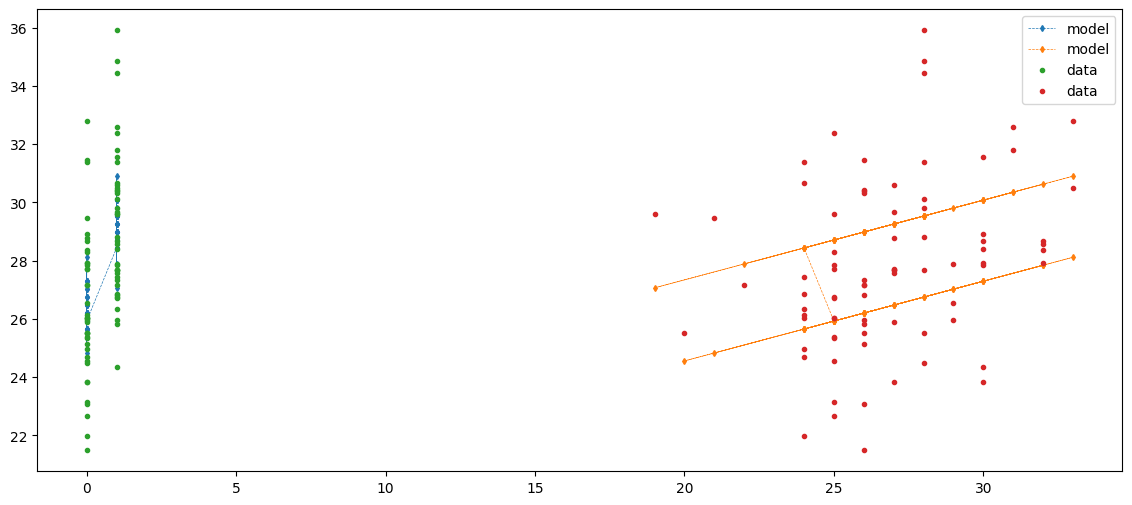

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))
#ax.plot(m.arm_perimeter_init, mod.endog, 'o', markersize = 3, label = 'data')
#ax.plot(m.arm_perimeter_init, mod.fit().fittedvalues, 'd--', linewidth = 0.5, markersize = 3, label = 'model')
ax.plot(mod.exog[:,1:], mod.fit().fittedvalues, 'd--', linewidth = 0.5, markersize = 3, label = 'model')
ax.plot(mod.exog[:,1:], mod.endog, 'o', markersize = 3, label = 'data')
#ax.plot(m.arm_perimeter_init, mod.fit().get_prediction().summary_frame().drop(columns = ['mean', 'mean_se']), '-', linewidth = 0.1, markersize = 3, label = mod.fit().get_prediction().summary_frame().drop(columns = ['mean', 'mean_se']).columns)
ax.legend(loc="best")
plt.show()

In [21]:
modw = smf.ols('BMI_init ~ sex + weight_init + height_init', data = m)

In [22]:
modw.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BMI_init   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1683.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           1.44e-72
Time:                        20:01:09   Log-Likelihood:                -17.981
No. Observations:                  80   AIC:                             45.96
Df Residuals:                      75   BIC:                             57.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        54.1267      1.029     52.582      0.000      52.076      56.177
group[T.Test]     0.0439      0.098      0.448      0.656      -0.151       0.239
sex[T.m]         -0.0360      0.074     -0.487      0.627      -0.183       0.111
weight_init       0.4078      0.006     68.354      0.000       0.396       0.420
height_init      -0.3460      0.008    -42.157      0.000      -0.362      -0.330
==============================================================================
Omnibus:                        5.604   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.891
Skew:                          -0.496   Prob(JB):                       0.0867
Kurtosis:                       3.694   Cond. No.                     5.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
modwf = smf.ols('weight_init ~ arm_perimeter_init + thorax_perimeter_init + abdominal_perimeter_init + hip_perimeter_init + group', data = m.loc[m['sex']=='f'])

In [11]:
modwf.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weight_init   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     1.987
Date:                Sun, 14 Apr 2024   Prob (F-statistic):              0.117
Time:                        19:57:48   Log-Likelihood:                -105.02
No. Observations:                  30   AIC:                             222.0
Df Residuals:                      24   BIC:                             230.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   13.3337     22.023      0.605      0.551     -32.119      58.786
group[T.Test]                2.7281      3.772      0.723      0.477      -5.058      10.514
arm_perimeter_init           1.0139      1.042      0.973      0.340      -1.137       3.165
thorax_perimeter_init        0.0424      0.271      0.157      0.877      -0.517       0.602
abdominal_perimeter_init     0.3540      0.255      1.389      0.178      -0.172       0.880
hip_perimeter_init          -0.0679      0.364     -0.186      0.854      -0.820       0.684
==============================================================================
Omnibus:                        2.626   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                1.534
Skew:                          -0.270   Prob(JB):                        0.464
Kurtosis:                       2.033   Cond. No.                     2.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
modwm = smf.ols('weight_init ~ arm_perimeter_init + thorax_perimeter_init + abdominal_perimeter_init + hip_perimeter_init + group', data = m.loc[m['sex']=='m'])

In [13]:
modwm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weight_init   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.295
Date:                Sun, 14 Apr 2024   Prob (F-statistic):              0.283
Time:                        19:57:48   Log-Likelihood:                -181.63
No. Observations:                  50   AIC:                             375.3
Df Residuals:                      44   BIC:                             386.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   46.0279     14.138      3.256      0.002      17.535      74.521
group[T.Test]               -3.0566      2.844     -1.075      0.288      -8.789       2.676
arm_perimeter_init           1.3009      0.675      1.929      0.060      -0.059       2.660
thorax_perimeter_init        0.0762      0.238      0.320      0.750      -0.404       0.556
abdominal_perimeter_init    -0.1036      0.244     -0.425      0.673      -0.595       0.388
hip_perimeter_init          -0.1132      0.222     -0.509      0.613      -0.561       0.335
==============================================================================
Omnibus:                        1.286   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.526   Jarque-Bera (JB):                1.285
Skew:                          -0.295   Prob(JB):                        0.526
Kurtosis:                       2.483   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
modBMIf = smf.ols('BMI_init ~ arm_perimeter_init + thorax_perimeter_init + abdominal_perimeter_init + hip_perimeter_init + group', data = m.loc[m['sex']=='f'])
modBMIf.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BMI_init   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     3.100
Date:                Sun, 14 Apr 2024   Prob (F-statistic):             0.0268
Time:                        19:57:48   Log-Likelihood:                -68.378
No. Observations:                  30   AIC:                             148.8
Df Residuals:                      24   BIC:                             157.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   15.8378      6.493      2.439      0.022       2.437      29.239
group[T.Test]                3.0195      1.112      2.715      0.012       0.724       5.315
arm_perimeter_init          -0.0189      0.307     -0.061      0.952      -0.653       0.615
thorax_perimeter_init        0.1063      0.080      1.329      0.196      -0.059       0.271
abdominal_perimeter_init     0.0546      0.075      0.727      0.474      -0.100       0.210
hip_perimeter_init          -0.0234      0.107     -0.218      0.829      -0.245       0.198
==============================================================================
Omnibus:                        2.291   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                2.046
Skew:                           0.596   Prob(JB):                        0.359
Kurtosis:                       2.536   Cond. No.                     2.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
modBMIm = smf.ols('BMI_init ~ arm_perimeter_init + thorax_perimeter_init + abdominal_perimeter_init + hip_perimeter_init + group', data = m.loc[m['sex']=='m'])
modBMIm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BMI_init   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     5.573
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           0.000462
Time:                        19:57:48   Log-Likelihood:                -110.06
No. Observations:                  50   AIC:                             232.1
Df Residuals:                      44   BIC:                             243.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   22.7866      3.378      6.745      0.000      15.978      29.595
group[T.Test]                2.3971      0.680      3.527      0.001       1.027       3.767
arm_perimeter_init           0.4433      0.161      2.751      0.009       0.118       0.768
thorax_perimeter_init       -0.0038      0.057     -0.067      0.947      -0.118       0.111
abdominal_perimeter_init    -0.0105      0.058     -0.179      0.858      -0.128       0.107
hip_perimeter_init          -0.0727      0.053     -1.369      0.178      -0.180       0.034
==============================================================================
Omnibus:                        0.202   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.283
Skew:                           0.140   Prob(JB):                        0.868
Kurtosis:                       2.761   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
modBMIf_thr = smf.ols('BMI_init ~ thorax_perimeter_init + group', data = m.loc[m['sex']=='f'])
modBMIf_thr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BMI_init   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     8.238
Date:                Sun, 14 Apr 2024   Prob (F-statistic):            0.00161
Time:                        19:57:48   Log-Likelihood:                -68.705
No. Observations:                  30   AIC:                             143.4
Df Residuals:                      27   BIC:                             147.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.0465      4.129      3.886      0.001       7.575      24.519
group[T.Test]             3.0839      0.924      3.339      0.002       1.189       4.979
thorax_perimeter_init     0.1260      0.050      2.515      0.018       0.023       0.229
==============================================================================
Omnibus:                        2.453   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                2.175
Skew:                           0.623   Prob(JB):                        0.337
Kurtosis:                       2.565   Cond. No.                         730.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
modBMIm_arm = smf.ols('BMI_init ~ arm_perimeter_init + hip_perimeter_init + group', data = m.loc[m['sex']=='m'])
modBMIm_arm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BMI_init   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     9.686
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           4.54e-05
Time:                        19:57:48   Log-Likelihood:                -110.08
No. Observations:                  50   AIC:                             228.2
Df Residuals:                      46   BIC:                             235.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             22.7606      3.298      6.901      0.000      16.122      29.399
group[T.Test]          2.4094      0.662      3.641      0.001       1.077       3.741
arm_perimeter_init     0.4268      0.133      3.218      0.002       0.160       0.694
hip_perimeter_init    -0.0801      0.038     -2.135      0.038      -0.156      -0.005
==============================================================================
Omnibus:                        0.321   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.852   Jarque-Bera (JB):                0.359
Skew:                           0.177   Prob(JB):                        0.836
Kurtosis:                       2.782   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""